# Differensiallikninger i 2D

Her skal vi se på hvordan man håndterer:

1. Poissonligning i 2D
2. Varmeligning i (2+1)D
3. 2D bevaringslover og bølgeligning

Med (2+1)D mener vi to dimensjoner i rom, og en i tid, dvs $u=u(x,y,t)$.

## 1. Poissonligning

Situasjon er ganske lik i todimensjoner:

$$
u_{xx}(x,y) + u_{yy}(x,y) = f(x,y)
$$

De partiellderiverte tilnærmes med

$$
u_{xx}(x,y) \approx \frac{u(x+h,y)-2u(x,y) +u(x-h,y)}{h^2} 
$$
$$
u_{yy}(x,y) \approx \frac{u(x,y+k)-2u(x,y) +u(x,y-k)}{k^2} 
$$

Vi tar $h,k$ som konstant, og $u_{m,n}=u(hm,kn)$, og ender opp med et lineært system:

$$
\frac{1}{h^2} \big( u_{m+1,n} + u_{m-1,n} \big) + 
\frac{1}{k^2} \big( u_{m,n+1} + u_{m,n-1} \big) -
\left( \frac{2}{h^2} + \frac{2}{k^2} \right)
u_{n,m} = f(mh,nk),
$$

Det kan skrives i matriseform hvis vi skriver $u = (u_{1,1}, u_{2,1},\ldots,u_{m,1},u_{1,2},\ldots)$. Den største utfordring i forhold til den endimensjonale ligningen er hvordan man håndtere $u$ som en vektor, da det ville vært lettere å ha den som en todimensjonal array.

### a) Vektorisering og "reshape"

Den naturlige måte å lage våre ukjente er i en array, $u_{i,j} = u(x_i, y_j)$.

Men målet vårt er å gjøre om poissonligningen til et lineært system

$$
L\vec{u} = \vec{F}
$$

som krever at vi gjør om $u$ til en vektor, for eksempel $u = (u_{1,1}, u_{2,1},\ldots,u_{m,1},u_{1,2},\ldots)$. Det kalles for en *vektorisering* (https://en.wikipedia.org/wiki/Vectorization_(mathematics))

Vi kan håndtere det gjennom bruk av "reshape" i numpy. 

### Oppgave: 

Øv på å bruke reshape helt til du har forstått hvordan den fungerer.


In [16]:
import numpy as np

# sett inn din egen array
u = np.array( [[1,2,3,4],[5,6,7,8]])

# Antall rader
m = u.shape[0]

# Antall kolonner
n = u.shape[1]

# reshape til vektor
u = np.reshape(u, m*n)

# reshape tilbake til matrise
u = np.reshape(u, (m, n))

### b) Vi lager matrisen 1: for-løkker

Utfordringen sammenlignet med 6_1 er å sette sammen ligningene

$$
\frac{1}{h^2} \big( u_{i+1,j} + u_{i-1,j} \big) + 
\frac{1}{k^2} \big( u_{i,j+1} + u_{i,j-1} \big) -
\left( \frac{2}{h^2} + \frac{2}{k^2} \right)
u_{i,j} = f(ih,jk),
$$

til et system

$$
L\vec{u} = \vec{F}
$$

ved hjelp av vektorisering. Vi skal se et smart triks i 1c) under, men vi kan få det til med en for-løkke også.

La oss tenke på vektorisering $u = (u_{1,1}, u_{2,1}, \ldots)$. Vi antar at dimensjonen på $u$ er $m \times n$. Da ser vi at etter vektorisering blir

$$
u_{i,j} = u_{i + mj}
$$

Vi har altså 

$$
\frac{1}{h^2} \big( u_{i+1 + mj} + u_{i-1+mj} \big) + 
\frac{1}{k^2} \big( u_{i+m(j+1)} + u_{i+m(j-1)} \big) -
\left( \frac{2}{h^2} + \frac{2}{k^2} \right)
u_{i+mj} = f(ih,jk),
$$

Som kan omskrives til

$$
\frac{1}{h^2} \big( u_{(i+mj)+1} + u_{(i+mj)-1} \big) + 
\frac{1}{k^2} \big( u_{(i+mj)+m)} + u_{(i+mj)-m)} \big) -
\left( \frac{2}{h^2} + \frac{2}{k^2} \right)
u_{i+mj} = f(ih,jk),
$$

Vis vi skriver $p=i+mj$, har vi

$$
\frac{1}{h^2} \big( u_{p+1} + u_{p-1} \big) + 
\frac{1}{k^2} \big( u_{(p+m)} + u_{(p-m)} \big) -
\left( \frac{2}{h^2} + \frac{2}{k^2} \right)
u_{p} = f(p),
$$

hvor vi forstår $f(p)$ gjennom vektorisering av $f(ih,jk)$.

In [17]:
# bestem antall punkter i gitteret i x-retning
m = 3

# sett m+2 punkter mellom 0 og 1
# m+2 fordi vi teller ikke randene 0 og 1 - se randbetingelser for hvorfor
x = np.linspace(0, 1, m+2)

# avstand mellom punktene
h = x[1] - x[0]

# antall punkter i gitteret i y-retning
n = 3

# sett n+2 punkter mellom 0 og 1
y = np.linspace(0, 1, n+2)

# avstand mellom punktene
k = y[1] - y[0]

# initialiserer matrisen
L_for = np.zeros((m*n, m*n))

# løkka, går fra p=0 til p=(m*n)-1
# setter inn hvert ledd i ligningen for u_p
# sjekker med "if" at hvert ledd vi vil legge inn er innenfor området
for p in np.arange(m*n):
    if np.mod(p,m) < m-1:
        L_for[p,p+1] = 1/(h**2)
    if np.mod(p,m) > 0:
        L_for[p,p-1] = 1/(h**2)
    if p<(m*(n-1)):
        L_for[p,p+m] = 1/(k**2)
    if p>=m:
        L_for[p,p-m] = 1/(k**2)
    L_for[p,p] = -2/(h**2) - 2/(k**2)
    
print(L_for)

[[-64.  16.   0.  16.   0.   0.   0.   0.   0.]
 [ 16. -64.  16.   0.  16.   0.   0.   0.   0.]
 [  0.  16. -64.   0.   0.  16.   0.   0.   0.]
 [ 16.   0.   0. -64.  16.   0.  16.   0.   0.]
 [  0.  16.   0.  16. -64.  16.   0.  16.   0.]
 [  0.   0.  16.   0.  16. -64.   0.   0.  16.]
 [  0.   0.   0.  16.   0.   0. -64.  16.   0.]
 [  0.   0.   0.   0.  16.   0.  16. -64.  16.]
 [  0.   0.   0.   0.   0.  16.   0.  16. -64.]]


### c) Vi lager matrisen 2: Kroneckerproduktet

Det er ganske vrient å sette opp matrisen med for-løkker, men et nyttig triks er å bruke *Kroneckerproduktet* (https://en.wikipedia.org/wiki/Kronecker_product). Det er et slags produkt av matriser, skrevet som $\otimes$, som oftig er nyttig i forbindelse med vektorisering. Merk at produktet er helt forskjellig fra matriseproduktet du kan fra før.

Her viser det seg at matrisen $L$ vi ønsker oss er lik

$$
L = L_m \otimes I_n + I_m \otimes L_n,
$$

hvor $L_m, L_n$ tilsvarer matrisene for henholdsvis $u_{xx}, u_{yy}$ (fra de en-dimensjonale tilnærmingene til poissonligningen), og $I_m, I_n$ er identitetsmatrisene med størrelse $m,n$.

In [18]:
import numpy as np

#
# Vi lager matrisen L
#

# Oppsett x-retning
m=20                   # antall punkter
x=np.linspace(0,1,m+2) # antall punkter + rand
h=x[1]-x[0]            # konstant avstand

# setter opp matrise tilsvarende Poissonligning i x-retning
Ln = (1/h**2)*(np.diag((m-1)*[1],-1) + np.diag((m)*[-2],0) + np.diag((m-1)*[1],1))
In = np.eye(m)

# antall punkter i gitteret i y-retning
n=20
y=np.linspace(0,1,n+2)
k = y[1]-y[0]
Lm = (1/k**2)*(np.diag((n-1)*[1],-1) + np.diag((n)*[-2],0) + np.diag((n-1)*[1],1))
Im = np.eye(n)

# sett sammen matrisa med Kroneckerproduktet
L = np.kron(Ln,Im) + np.kron(In,Lm)

## 2. Dirichletbetingelser

Randbetingelsene vi velger påvirker både matrise $L$ og vektoren $\vec{F}$, slik vi så for en dimensjon i rom.

Vi begynner med dirichletbetingelser, hvor $u$ oppgis på randen.

Siden vi jobber med $0<x<1$ og $0<y<1$, har randen fire deler:

1. $y=0$

Her setter vi $u(x,0) = f_1(x)$.

2. $y=1$

Her setter vi $u(x,1) = f_2(x)$.

3. $x=0$

Her setter vi $u(0,y) = f_3(y)$.

4. $x=1$

Her setter vi $u(1,y) = f_4(y)$.

Alle funksjonene $f_i$ antas oppgitt i problemet. Husk at vi ønsker å løse et lineært system med ligninger

$$
\frac{1}{h^2} \big( u_{i+1,j} + u_{i-1,j} \big) + 
\frac{1}{k^2} \big( u_{i,j+1} + u_{i,j-1} \big) -
\left( \frac{2}{h^2} + \frac{2}{k^2} \right)
u_{n,m} = f(ih,jk),
$$

Fremgangsmåte er som for en dimensjon. Alle $u_{i,j}$ i disse ligningene som havner på randen sendes over til den høyre siden. For eksempel, hvis vi tar $m=n=1$, har vi

$$
\frac{1}{h^2} u_{2,1} + \frac{1}{k^2} u_{1,2}  - \left( \frac{2}{h^2} + \frac{2}{k^2} \right) u_{1,1} = f(h,k) - \frac{1}{h^2} u_{0,1} - \frac{1}{k^2} u_{1,0}
$$

Vi kan da sette inn $u_{0,1} = u(0,k) = f_3(k)$ og $u_{1,0} = u(h,0) = f_1(h)$ og få

$$
\frac{1}{h^2} u_{2,1} + \frac{1}{k^2} u_{1,2}  - \left( \frac{2}{h^2} + \frac{2}{k^2} \right) u_{1,1} = f(h,k) - \frac{1}{h^2} f_3(k) - \frac{1}{k^2} f_1(h)
$$

Konklusjonen er at vi ikke trenger å gjøre noe med matrisa $L$, men at vi legger til ekstraleddene som kommer fra $f_i$ på høyresiden.

### Eksempel 1.

Her er koden som løser randverdiproblem med $f(x)=0$ og $u(x,0)=u(0,y)=u(1,y)=0$, $u(x,1)=\sin(\pi x)$.

Her kan vi sammenligne med en eksakt løsningen (som kan finnes med separasjon av variable) lik

$$
u(x,y) = \frac{\sin(\pi x)\sinh(\pi y)}{\sinh(\pi)}
$$

Koden under bruker Kroneckerproduktet til å legge til randbetingelsene på riktig plass.

In [23]:
#
# Vi lager randbetingelsene i F
#

# Lag en vektor (-1/h^2,0,0,0,...) med m elementer
Zm_l = np.zeros(m)
Zm_l[0] = -1/(h**2)

# Lag en vektor (0,0,0,...,0,-1/h^2) med m elementer
Zm_r = np.zeros(m)
Zm_r[-1] = -1/(h**2)

# Lag en vektor (-1/k^2,0,0,0,...) med n elementer
Zn_l = np.zeros(n)
Zn_l[0] = -1/(k**2)

# Lag en vektor (0,0,0,...,0,-1/k^2) med n elementer
Zn_r = np.zeros(n)
Zn_r[-1] = -1/(k**2)

# funksjonen som gir u(x,0)
def f1(x):
    return 0*x

# funksjonen som gir u(x,1)
def f2(x):
    return np.sin(np.pi*x)

# funksjonen som gir u(y,0)
def f3(y):
    return 0*y

# funksjonen som gir u(y,1)
def f4(y):
    return 0*y

# Lag en vektor fra randbetingelser
F = np.kron(f1(x[1:-1]),Zn_l) + np.kron(f2(x[1:-1]),Zn_r) + np.kron(Zm_l,f3(y[1:-1])) + np.kron(Zm_r,f4(y[1:-1]))

In [24]:
#
# Vi lager initialbetingelsene i F
#

# Lag et rutenett fra punktene i x og y
# velger indexing='ij' siden vi bruker F[i,j] = F[x_i,y_j], ikke F[x_j,y_i]
X,Y = np.meshgrid(x[1:-1],y[1:-1], indexing='ij')

# vi bruker f(x,y)=0, erstatt med annen funksjon hvis ønskelig.
def f(x,y):
    return 0*x*y 
   
# funksjonsverdiene på rutenettet
Z = f(X,Y)

# vektoriserer
G = np.reshape(Z,(m*n))

# legg sammen f(x,y) med randbetingelsene 
F = F + G


### Løsning

Nå er vi klar til å løse systemet

$$
L\vec{u} = \vec{F}
$$

For å plotte resultatet bruker vi reshape til å få tilbake $U(x_i,y_j)$ som en array.

**Obs**: koden over bruker $(x_i,y_j)$, ikke $(x_j,y_i)$, se diskusjonen i 6_1, "Advarsel: arrayer, rutenett og meshgrid".

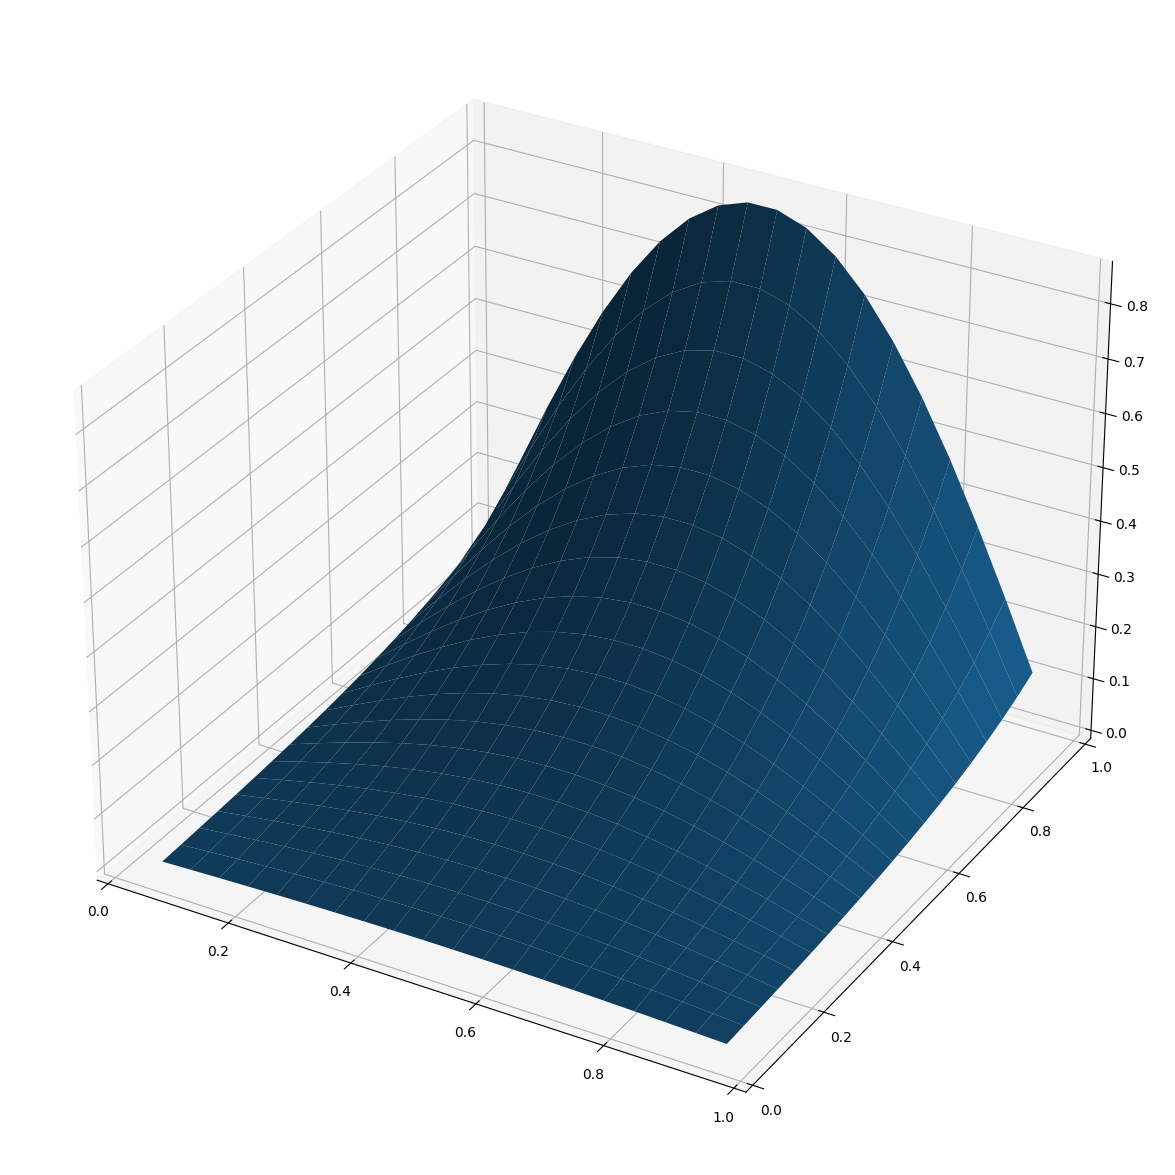

In [25]:
import matplotlib.pyplot as plt
import numpy.linalg as la

# Vi bruker transpose for å gi vår vektor riktig
u = la.solve(L,np.transpose(F))

# "reshape" til et rutenett
U = np.reshape(u,(m,n))

# lag figuren
fig,ax = plt.subplots(subplot_kw ={"projection":"3d"}, figsize=(15,15))

# plotter
ax.plot_surface(X, Y, U)
plt.show()



Den kan sammenlignes med den eksakte løsningen:

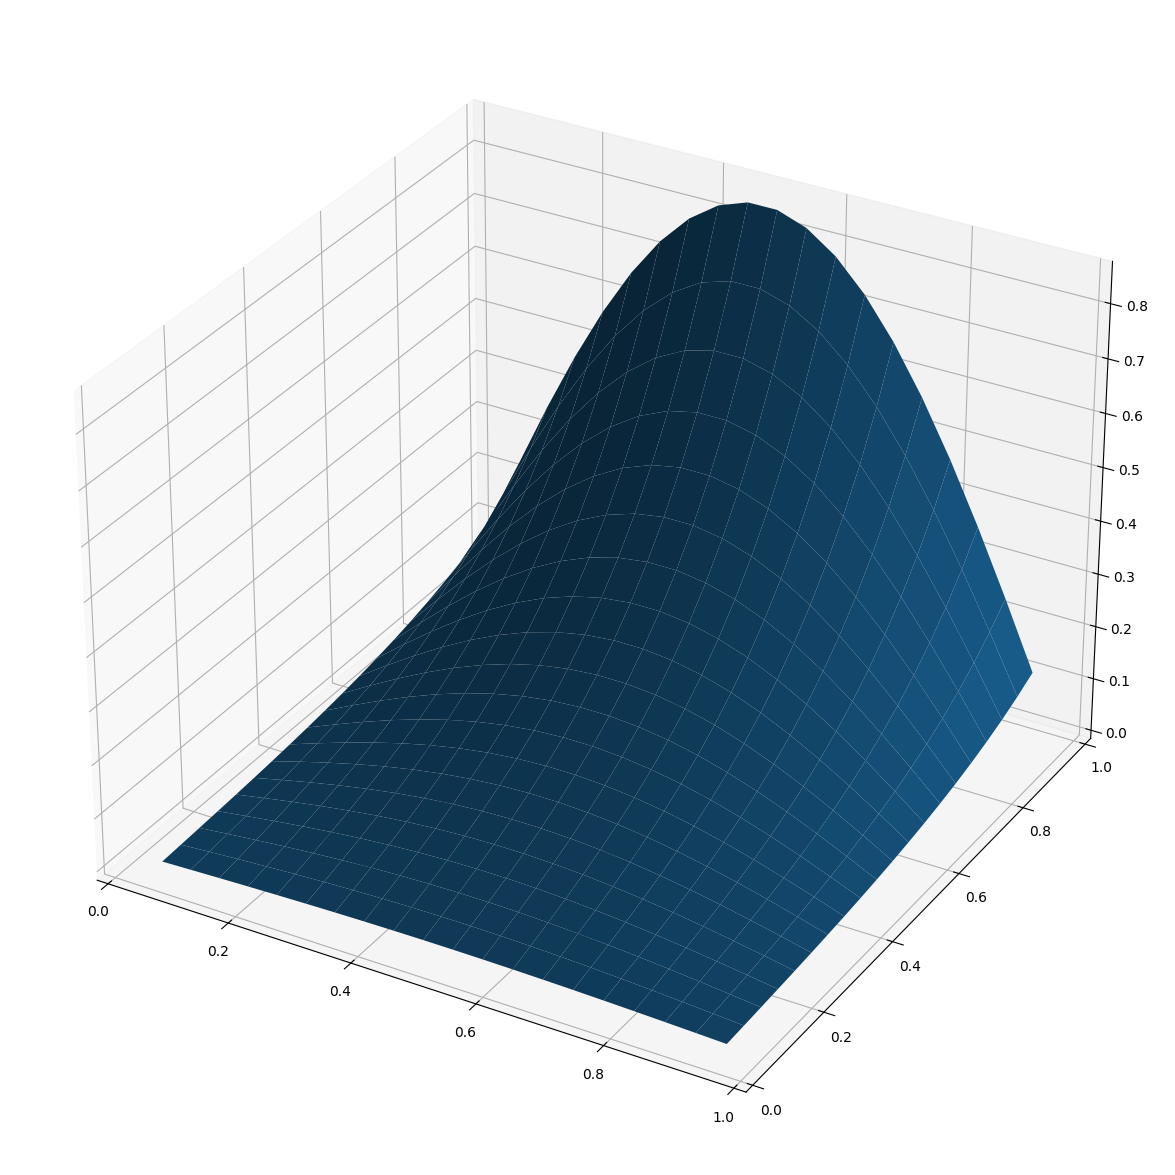

In [26]:

def u(x,y):
    return np.sin(np.pi*x)*np.sinh(np.pi*y)/np.sinh(np.pi)

Z = u(X,Y)

fig,ax2 = plt.subplots(subplot_kw ={"projection":"3d"}, figsize=(15,15))

ax2.plot_surface(X, Y, Z) #vmin=Z.min() * 2, cmap=cm.Blues)

plt.show()